### Registration ID : GO_STP_9654

Predict retention of an employee within an organization such that whether the employee will leave the company or continue with
it. An organization is only as good as its employees, and these people are the true source of its competitive advantage.
First do data exploration and visualization, after this create a logistic regression model to predict Employee Attrition Using
Machine Learning & Python.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

In [148]:
df.isnull().sum()

satisfaction_level        0
last_evaluation           0
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
Department_IT             0
Department_RandD          0
Department_accounting     0
Department_hr             0
Department_management     0
Department_marketing      0
Department_product_mng    0
Department_sales          0
Department_support        0
salary_high               0
salary_low                0
dtype: int64

In [149]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [151]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [152]:
df.shape

(14999, 10)

In [153]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [154]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [155]:
import matplotlib.pyplot as plt
import seaborn as sb

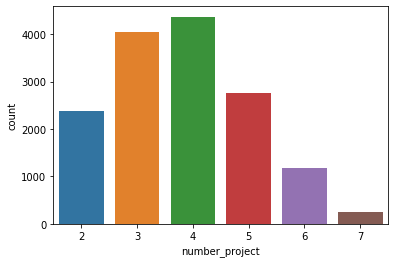

In [156]:
sb.countplot(x = "number_project", data = df);

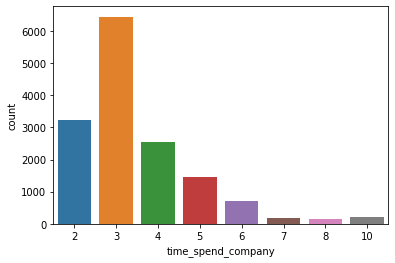

In [157]:
sb.countplot(x = "time_spend_company", data = df);

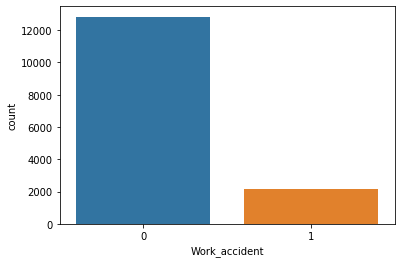

In [158]:
sb.countplot(x = "Work_accident", data = df);

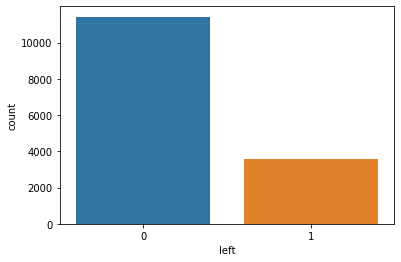

In [159]:
sb.countplot(x = "left", data = df);

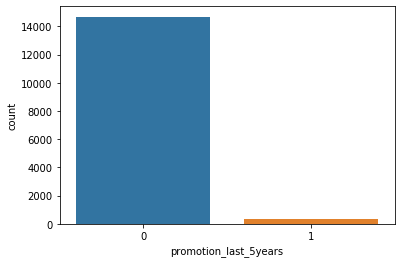

In [160]:
sb.countplot(x = "promotion_last_5years", data = df);

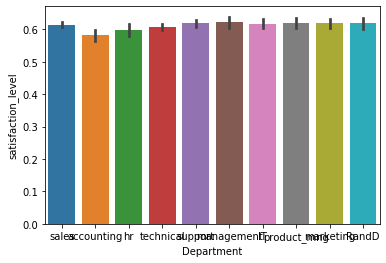

In [161]:
sb.barplot(x = "Department", y = "satisfaction_level", data = df);

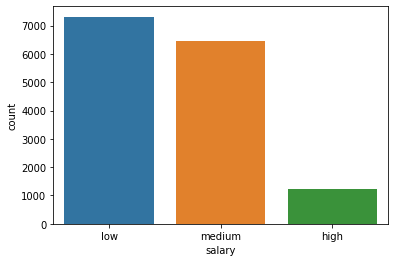

In [162]:
sb.countplot(x = "salary", data = df)

In [114]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [115]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [116]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

### By Using Dummy Variable

In [117]:
# get_dummies() creates no. of columns equal to no. of unique values for dept % salary column bcz dept & salary having categorical value
dummies = pd.get_dummies(df[['Department','salary']])  # get_dummies() = label encoding + one hot encoding
dummies.head()

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [118]:
# Drop last value for each column (dept- Department_technical) (salary- medium)
dummies = dummies.drop(['Department_technical', 'salary_medium'], axis='columns')
dummies.head()

,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,salary_high,salary_low
0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,1
4,0,0,0,0,0,0,0,1,0,0,1


In [119]:
# # drop dept and salary columns from dataset bcz it's having string data type
df = df.drop(['Department','salary'], axis='columns')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [120]:
# concate original and dummies dataframe according to columns
df = pd.concat([df, dummies], axis='columns')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,salary_high,salary_low
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [122]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_IT', 'Department_RandD',
       'Department_accounting', 'Department_hr', 'Department_management',
       'Department_marketing', 'Department_product_mng', 'Department_sales',
       'Department_support', 'salary_high', 'salary_low'],
      dtype='object')

In [126]:
y = df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [127]:
x = df.drop('left', axis='columns')
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department_IT,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,salary_high,salary_low
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0,0,0,0,0,0,0,0,0,1,0,1
14995,0.37,0.48,2,160,3,0,0,0,0,0,0,0,0,0,0,1,0,1
14996,0.37,0.53,2,143,3,0,0,0,0,0,0,0,0,0,0,1,0,1
14997,0.11,0.96,6,280,4,0,0,0,0,0,0,0,0,0,0,1,0,1


In [130]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=1) # random_size: reproduce same dataset for training and testing after running algorithm everytime

In [132]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [133]:
Mymodel = model.fit(xtrain,ytrain)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [134]:
y_pred = model.predict(xtest)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Confusion Matrix

In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,y_pred)
cm

array([[3125,  291],
       [ 665,  419]], dtype=int64)

# Accuracy

In [136]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,y_pred))

0.7875555555555556


### By Using One Hot Encoding

In [17]:
df1 = pd.read_csv("HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [21]:
# label encoder just converting string to numerical for column which has string data type
df1.Department = le.fit_transform(df1.Department)
df1.salary = le.fit_transform(df1.salary)
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [24]:
# one hot encoder just creating dummy variables equal to unique values present in column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('Department', OneHotEncoder(), [8])], remainder = 'passthrough')
ct = ColumnTransformer([('salary', OneHotEncoder(), [9])], remainder = 'passthrough')
newct = ct.fit_transform(df1)
newct

array([[0., 1., 0., ..., 1., 0., 7.],
       [0., 0., 1., ..., 1., 0., 7.],
       [0., 0., 1., ..., 1., 0., 7.],
       ...,
       [0., 1., 0., ..., 1., 0., 8.],
       [0., 1., 0., ..., 1., 0., 8.],
       [0., 1., 0., ..., 1., 0., 8.]])